# Prediction using Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(['Id'],axis=1,inplace=True)


In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
data.drop_duplicates(inplace = True)

###Label Encoding

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

###PetalLengthCm vs PetalWidthCm 
<p>We will compare our final plot with this graph to check the accuracy of the model</p>

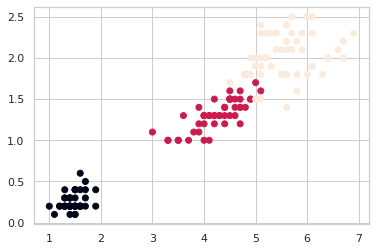

In [32]:
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c =data.Species.values)

In [33]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


###Data Vizualization

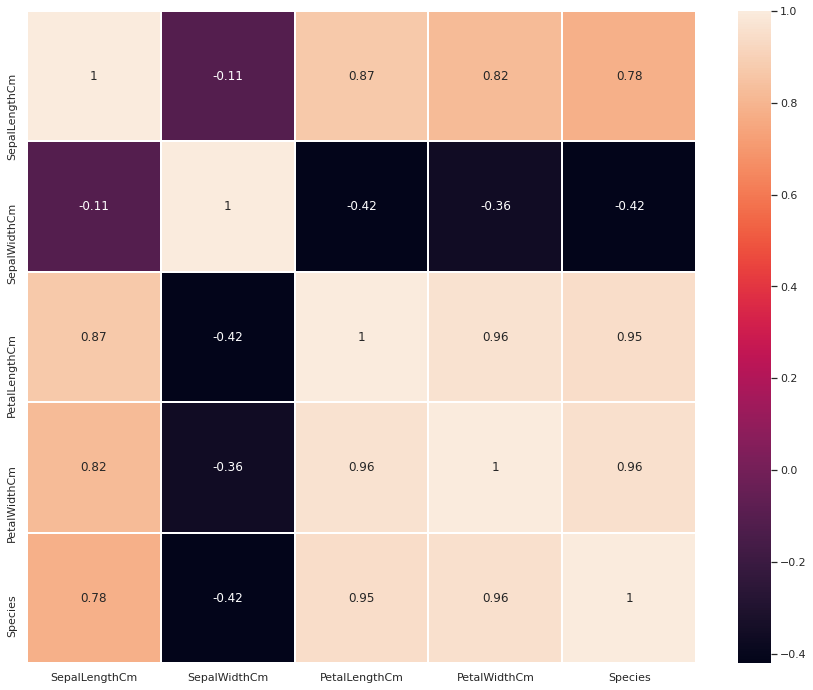

In [34]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), linewidths=1, annot = True)

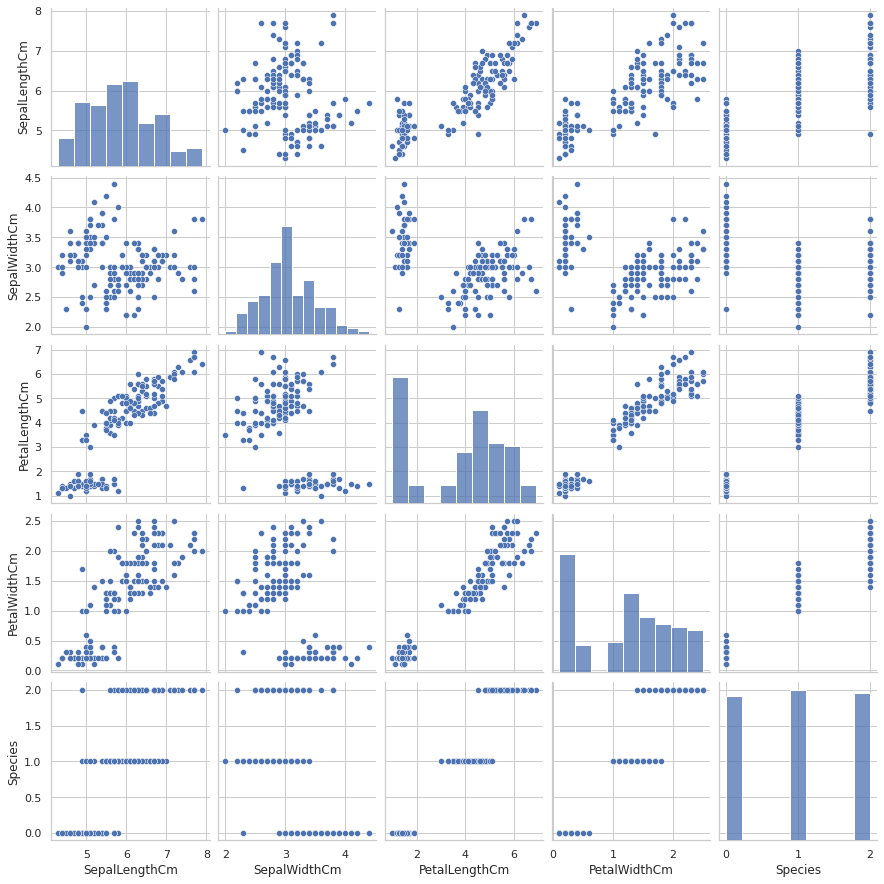

In [35]:
sns.pairplot(data)

<p>We can observe that Species is mainly dependent on Petal Length and Petal Width</p>

In [36]:
data = data.iloc[:,[0,1,2,3]].values

In [37]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

wcss

[663.895238095238,
 151.77145833333336,
 77.91989035087718,
 56.64237065018315,
 45.836345238095234,
 38.65691713471713,
 34.29663892958893,
 29.788370882190108,
 27.9695088013838,
 25.858146367521364]

###Using elbow plot to find maximum number of clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


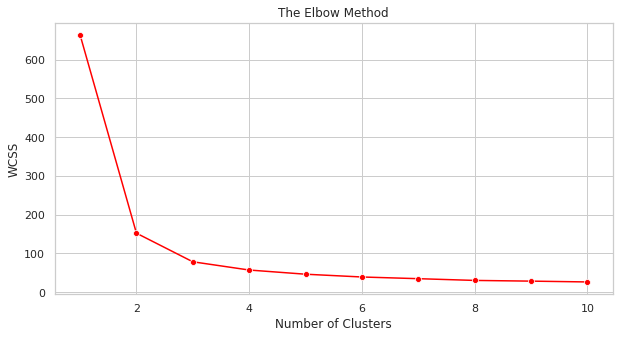

In [38]:
plt.figure(figsize=(10,5))
sns.set(style = 'whitegrid')
sns.lineplot(range(1,11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<p>The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value of K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop is minimal.</p>

###Initializing KMeans++

In [39]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=5)
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

###Vizualizing the clusters

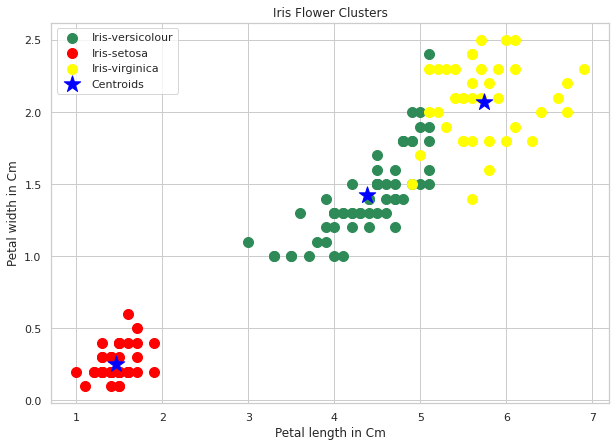

In [40]:
fig = plt.figure(figsize=(10,7))
plt.title('Clusters with centroid', fontweight='bold', fontsize=20)
plt.scatter(data[y_kmeans == 0,2], data[y_kmeans == 0,3], s=100, c='seagreen', label='Iris-versicolour')
plt.scatter(data[y_kmeans == 1,2], data[y_kmeans == 1,3], s=100, c='red', label='Iris-setosa')
plt.scatter(data[y_kmeans == 2,2], data[y_kmeans == 2,3], s=100, c='yellow', label = "Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s=300, c='blue', marker='*', label="Centroids")
plt.xlabel('Petal length in Cm')
plt.ylabel('Petal width in Cm')
plt.title('Iris Flower Clusters')
plt.legend()

<p>We can see that our predicted graph is similar to the actual graph.</p>

# YASH SINGH